In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [35]:
df = pd.read_csv('../../Traffic_Violations_2023.csv', encoding='cp1250', sep=',')

In [36]:
df = df[df['Accident'] == 'Yes']
df = df[['SubAgency', 'Belts',
       'Personal Injury', 'Property Damage', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'VehicleType', 'Violation Type',
       'Contributed To Accident', 'Race', 'Gender',
       'Driver State', 'Arrest Type']]
#df = df.replace('-', '', regex=True)


In [53]:
df

,SubAgency,Belts,Personal Injury,Property Damage,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,VehicleType,Violation Type,Contributed To Accident,Race,Gender,Driver State,Arrest Type
14,"3rd District, Silver Spring",No,0,No,No,No,No,No,No,02 - Automobile,Citation,True,HISPANIC,M,MD,A - Marked Patrol
15,"3rd District, Silver Spring",No,0,No,No,No,No,No,No,02 - Automobile,Citation,True,HISPANIC,M,MD,A - Marked Patrol
17,"3rd District, Silver Spring",No,0,No,No,No,No,No,No,02 - Automobile,Citation,True,HISPANIC,M,MD,A - Marked Patrol
18,"3rd District, Silver Spring",No,0,No,No,No,No,No,No,02 - Automobile,Citation,True,HISPANIC,M,MD,A - Marked Patrol
22,"3rd District, Silver Spring",No,0,No,No,No,No,No,No,02 - Automobile,Citation,True,HISPANIC,M,MD,A - Marked Patrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68826,"2nd District, Bethesda",No,0,Yes,No,No,No,No,No,02 - Automobile,Citation,True,BLACK,M,MD,A - Marked Patrol
68827,"2nd District, Bethesda",No,0,Yes,No,No,No,No,No,02 - Automobile,Citation,True,BLACK,M,MD,A - Marked Patrol
68836,"4th District, Wheaton",No,0,Yes,No,No,No,No,No,02 - Automobile,Citation,True,OTHER,M,MD,A - Marked Patrol
68962,"2nd District, Bethesda",No,0,Yes,No,No,No,No,No,02 - Automobile,Citation,True,HISPANIC,M,MD,A - Marked Patrol


In [38]:
df['Personal Injury'] = df['Personal Injury'].replace({'No': 0, 'Yes': 1})
encoded_data = pd.get_dummies( df , drop_first=True)
encoded_data.head()

C:\Users\tomancovan\AppData\Local\Temp\ipykernel_7824\4868738.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Personal Injury'] = df['Personal Injury'].replace({'No': 0, 'Yes': 1})


,Personal Injury,Contributed To Accident,"SubAgency_2nd District, Bethesda","SubAgency_3rd District, Silver Spring","SubAgency_4th District, Wheaton","SubAgency_5th District, Germantown","SubAgency_6th District, Gaithersburg / Montgomery Village",SubAgency_Headquarters and Special Operations,Belts_Yes,Property Damage_Yes,...,Driver State_SC,Driver State_TN,Driver State_TX,Driver State_VA,Driver State_WV,Arrest Type_B - Unmarked Patrol,Arrest Type_L - Motorcycle,Arrest Type_M - Marked (Off-Duty),Arrest Type_P - Mounted Patrol,Arrest Type_Q - Marked Laser
14,0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17,0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18,0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,0,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
X = encoded_data.drop('Personal Injury', axis=1)  # Features
y = encoded_data['Personal Injury']  # Target variable

# Rozdělení datasetu na trénovací a testovací v poměru 80:20. Random state, který zajistí reproducibilitu je 42. Parametr stratify=y zajistí,
# že budou proporce datasetu vyváženy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

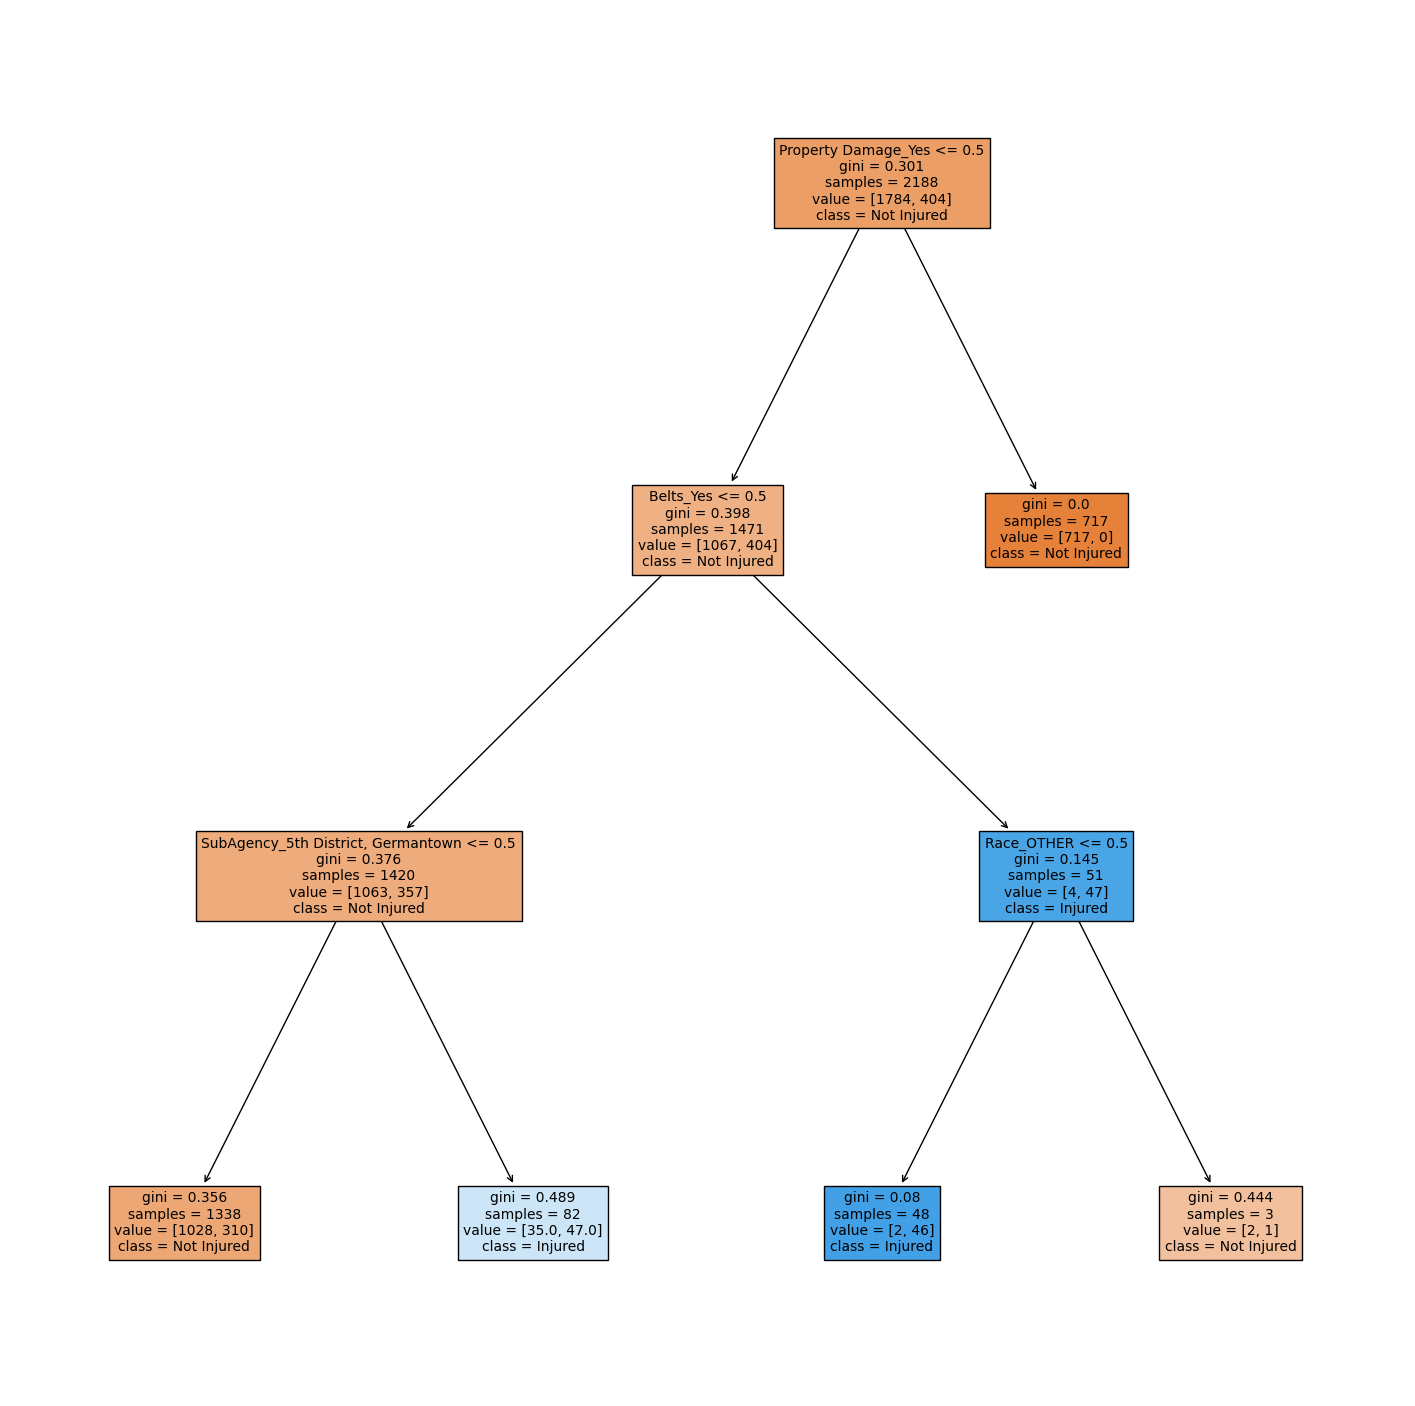

In [55]:
# Definování modelu a fitování hodnot na trénovacích datech
decision_tree = DecisionTreeClassifier(max_depth = 3)
model_tree = decision_tree.fit(X_train, y_train)
# Predikce hodnot targetu na testovacích datech
y_pred_tree = model_tree.predict(X_test)
# Accuracy a další pro tento model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

#Vykreslení rozhodnovacího stromu
plt.figure(figsize=(18,18))
plot_tree(model_tree,feature_names = list(X_train.columns), 
               class_names=['Not Injured', 'Injured'],
               filled = True,fontsize=10)  
plt.savefig('tree.png')

In [56]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Model interpretation
importances = rf_classifier.feature_importances_

feature_importance = list(zip(importances, X.columns))  # Replace 'X' with your feature DataFrame
feature_importance.sort(reverse=True)

for importance, feature in feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Property Damage_Yes, Importance: 0.24643035063090532
Feature: Belts_Yes, Importance: 0.08075581561161393
Feature: Gender_M, Importance: 0.07197854762538301
Feature: SubAgency_2nd District, Bethesda, Importance: 0.04810707000189041
Feature: Commercial License_Yes, Importance: 0.04788878079402046
Feature: Race_BLACK, Importance: 0.045334207705630486
Feature: SubAgency_Headquarters and Special Operations, Importance: 0.04220988529141694
Feature: Violation Type_Warning, Importance: 0.04052100995479752
Feature: Race_WHITE, Importance: 0.0398509275251646
Feature: SubAgency_5th District, Germantown, Importance: 0.03840492072993331
Feature: Race_HISPANIC, Importance: 0.03481099447138668
Feature: SubAgency_3rd District, Silver Spring, Importance: 0.03274957117273207
Feature: SubAgency_4th District, Wheaton, Importance: 0.02956578736949656
Feature: Arrest Type_B - Unmarked Patrol, Importance: 0.026308973040356017
Feature: Race_OTHER, Importance: 0.02527052022629637
Feature: VehicleType_

In [62]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr =  model_lr.score(X_test,y_test)
report_lr = classification_report(y_test, y_pred_lr)

#tabulka s odhady regresních koeficientů a s poměry šancí
names_lr=X_train.columns.tolist()+['Intercept']
values_lr = np.append(model_lr.coef_.reshape(47), model_lr.intercept_).tolist()
odd_ratio_lr = np.exp(values_lr).tolist() #interpretation of coefficients
odhady_lr = {'Explanatory Variable':names_lr, 'Coefficient':values_lr, 'Odds Ratio':odd_ratio_lr}
pd.DataFrame(odhady_lr).sort_values(by=['Odds Ratio'], ascending=False)

,Explanatory Variable,Coefficient,Odds Ratio
7,Belts_Yes,2.460184,11.706964
10,Alcohol_Yes,1.598748,4.946833
9,Commercial License_Yes,1.327290,3.770810
4,"SubAgency_5th District, Germantown",1.252582,3.499367
13,VehicleType_03 - Station Wagon,1.088838,2.970821
35,Driver State_NE,0.776248,2.173303
6,SubAgency_Headquarters and Special Operations,0.655639,1.926372
37,Driver State_SC,0.586678,1.798006
36,Driver State_PA,0.555555,1.742908
20,VehicleType_28 - Other,0.512461,1.669395


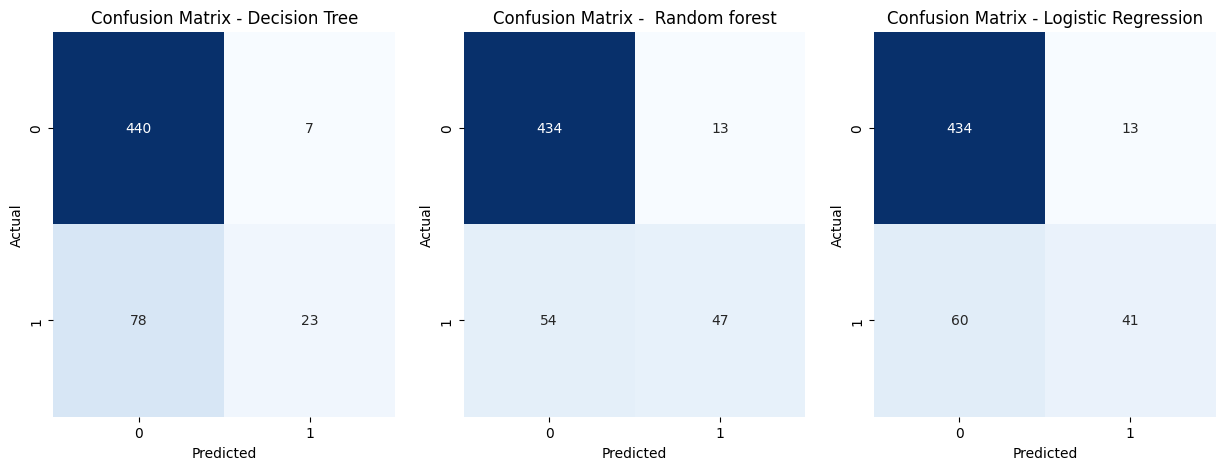

In [63]:
# Vykreslení Confusion Matrices
fig = plt.figure(figsize=(15,5))

cm_tree = confusion_matrix(y_test, y_pred_tree)
ax1 = fig.add_subplot(1, 3, 1)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

#
cm_rf = confusion_matrix(y_test, y_pred_rf)
ax2 = fig.add_subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -  Random forest')

#
cm_lr = confusion_matrix(y_test, y_pred_lr)
ax3 = fig.add_subplot(1, 3, 3)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

plt.show()

AUC Score: 0.7806388021352471
AUC Score: 0.9061731676523357
AUC Score: 0.871973774558664


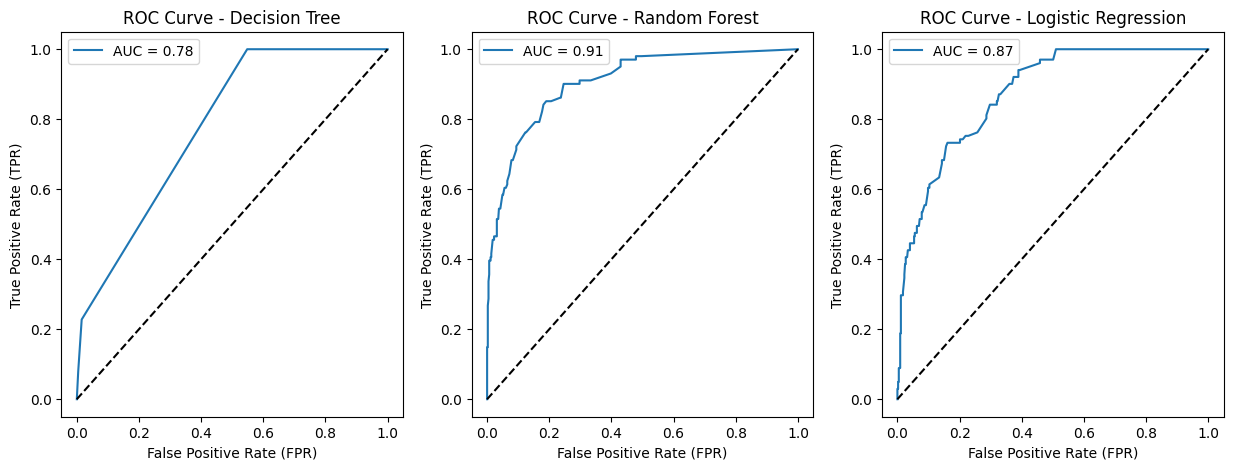

In [64]:
# vykreslení ROC křivek, určení AUC

# DT:
# predikované pravděpodobnosti příslušnosti dané osoby do kategorie Injured
y_pred_prob_tree = model_tree.predict_proba(X_test)[:,1]
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tree)
# AUC score
auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
print(f"AUC Score: {auc_tree}")
# Plot
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc_tree:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree')
plt.legend()


# RF:
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC Score: {auc_rf}")
ax2 = fig.add_subplot(1, 3, 2)
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend()

# LR
y_pred_prob_lr = model_lr.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
print(f"AUC Score: {auc_lr}")
ax3 = fig.add_subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f'AUC = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend()

plt.show()

In [76]:
precision_summary = pd.concat([pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_tree)[0], index = ['Not Injured', 'Injured'], columns = ['Decision Tree']).transpose(),
                                pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_rf)[0], index = ['Not Injured', 'Injured'], columns = ['Random Forest']).transpose(),
                                pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_lr)[0], index = ['Not Injured', 'Injured'], columns = ['Logistic Regression']).transpose()])
d1 = {'Average': [precision_score(y_test, y_pred_tree,average='macro'),
                      precision_score(y_test, y_pred_rf,average='macro'),
                      precision_score(y_test, y_pred_lr,average='macro')],
     'Weighted Avg': [precision_score(y_test, y_pred_tree,average='micro'),
                      precision_score(y_test, y_pred_rf,average='micro'),
                      precision_score(y_test, y_pred_lr,average='micro')]}
precision_summary = precision_summary.join(pd.DataFrame(data=d1, index = precision_summary.index))
#precision_summary.style.set_caption('Precision')
precision_summary

,Not Injured,Injured,Average,Weighted Avg
Decision Tree,0.849421,0.766667,0.808044,0.844891
Random Forest,0.889344,0.783333,0.836339,0.877737
Logistic Regression,0.878543,0.759259,0.818901,0.866788


In [77]:
recall_summary = pd.concat([pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_tree)[1], index = ['Not Injured', 'Injured'], columns = ['Decision Tree']).transpose(), 
                                 pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_rf)[1], index = ['Not Injured', 'Injured'], columns = ['Random Forest']).transpose(), 
                                 pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_lr)[1], index = ['Not Injured', 'Injured'], columns = ['Logistic Regression']).transpose()])
d = {'Average': [recall_score(y_test, y_pred_tree,average='macro'),
                      recall_score(y_test, y_pred_rf,average='macro'),
                      recall_score(y_test, y_pred_lr,average='macro')],
     'Weighted Avg': [recall_score(y_test, y_pred_tree,average='micro'),
                      recall_score(y_test, y_pred_rf,average='micro'),
                      recall_score(y_test, y_pred_lr,average='micro')]}
recall_summary = recall_summary.join(pd.DataFrame(data=d, index = recall_summary.index))
#recall_summary.style.set_caption('Recall')
recall_summary

,Not Injured,Injured,Average,Weighted Avg
Decision Tree,0.984340,0.227723,0.606031,0.844891
Random Forest,0.970917,0.465347,0.718132,0.877737
Logistic Regression,0.970917,0.405941,0.688429,0.866788


In [78]:
fscore_summary = pd.concat([pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_tree)[2], index = ['Not Injured', 'Injured'], columns = ['Decision Tree']).transpose(), 
                            pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_rf)[2], index = ['Not Injured', 'Injured'], columns = ['Random Forest']).transpose(), 
                            pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_lr)[2], index = ['Not Injured', 'Injured'], columns = ['Logistic Regression']).transpose()])
d3 = {'Average': [f1_score(y_test, y_pred_tree,average='macro'),
                      f1_score(y_test, y_pred_rf,average='macro'),
                      f1_score(y_test, y_pred_lr,average='macro')],
     'Weighted Avg': [f1_score(y_test, y_pred_tree,average='micro'),
                      f1_score(y_test, y_pred_rf,average='micro'),
                      f1_score(y_test, y_pred_lr,average='micro')]}
fscore_summary = fscore_summary.join(pd.DataFrame(data=d1, index = fscore_summary.index))
#fscore_summary.style.set_caption('F1 Score')
fscore_summary

,Not Injured,Injured,Average,Weighted Avg
Decision Tree,0.911917,0.351145,0.808044,0.844891
Random Forest,0.928342,0.583851,0.836339,0.877737
Logistic Regression,0.922423,0.529032,0.818901,0.866788


In [72]:
accuracy_summary = pd.DataFrame([accuracy_tree,accuracy_rf,accuracy_lr],
                                columns = ['Accuracy'], 
                             index = ['Decision Tree','Random Forest','Logistic Regression'])
accuracy_summary

,Accuracy
Decision Tree,0.844891
Random Forest,0.877737
Logistic Regression,0.866788


Ačkoli ani model logistické regrese nevyšel vůbec špatně, tak ze všech ukázaných pohledů vychází jako nejlepší model Random Forest. Model rozhodovacího stromu se jeví z těchto tří variant jako nejhorší možnost.